In [1]:
include("OUPLibrary.jl");

   Resolving package versions...


  No Changes to `C:\Users\whitl\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\whitl\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\whitl\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\whitl\.julia\environments\v1.9\Manifest.toml`


In [3]:
function OrnsteinUhlenbeckAvgValues(θ, μ, u0, t)

    values = []

    for i in t

        x = OrnsteinUhlenbeckAvg(θ, μ, u0, i)

        push!(values, x)
    
    end

    return values

end

function ErrorCalculator(x,y)

    errors = []

    for i in 1:lastindex(x)

        z = abs((y[i]-x[i])/x[i])*100

        push!(errors,z)
    end

    return errors

end

ErrorCalculator (generic function with 1 method)

In [4]:
θ = 1.0
μ = 0
σ = sqrt(2)

u0 = 10.0  
tf = 10

tspan = (0.0, tf)  # Time interval from 0.0 to 10.0

samples = 100000
saveint = 0.01
dt2 = 0.01

amount = 1

1

In [5]:
soln = AverageValueAddaptive(θ, μ, σ, u0, tspan, saveint, LambaEM(), samples)
soln2 = AverageValueFixed(θ, μ, σ, u0, tspan, dt2, EM(), samples)
soln3 = AverageValueAddaptive(θ, μ, σ, u0, tspan, saveint, LambaEulerHeun(), samples)
soln4 = AverageValueFixed(θ, μ, σ, u0, tspan, dt2, EulerHeun(), samples)

1001-element Vector{Float64}:
 10.0
  9.900653806648764
  9.801741907953513
  9.70427328621002
  9.607668477163717
  9.51262911860349
  9.417607202516207
  9.323157278530468
  9.23084840772114
  9.139078757047004
  ⋮
  0.0009242919594849533
  0.0015013604035239371
  0.0015761810872985057
  0.0017467826591455096
  0.0021587760267387447
  0.0010953914426025484
  0.0011742544467784805
  0.0012374745538828828
  0.0017571982261420265

In [7]:
tims =  timeperSampleAverageAddaptive(θ, μ, σ, u0, tspan, saveint, LambaEM(), samples, amount)
tims2 = timeperSampleAverageFixed(θ, μ, σ, u0, tspan, dt2, EM(), samples, amount)    
tims3 =  timeperSampleAverageAddaptive(θ5, μ5, σ5, u05, tspan5, saveint5, LambaEulerHeun(), samples, amount)
tims4 = timeperSampleAverageFixed(θ, μ, σ, u0, tspan, dt2, EulerHeun(), samples, amount)

MethodError: MethodError: no method matching zero(::Type{Any})

Closest candidates are:
  zero(::Type{Union{Missing, T}}) where T
   @ Base missing.jl:105
  zero(!Matched::Union{Type{P}, P}) where P<:Dates.Period
   @ Dates C:\Users\whitl\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\Dates\src\periods.jl:51
  zero(!Matched::G) where G<:Graphs.AbstractGraph
   @ Graphs C:\Users\whitl\.julia\packages\Graphs\FXxqo\src\interface.jl:346
  ...


In [6]:
t = 10.0
dt1 = saveint
arr = range(0, tf, Int(tf/dt1 + 1))
arr1 = range(0, tf, Int(tf/dt2 + 1))

0.0:0.01:10.0

In [7]:
soln5 = OrnsteinUhlenbeckAvgValues(θ, μ, u0, arr)
soln6 = OrnsteinUhlenbeckAvgValues(θ, μ, u0, arr1)

1001-element Vector{Any}:
 10.0
  9.900498337491682
  9.801986733067553
  9.70445533548508
  9.607894391523232
  9.51229424500714
  9.417645335842487
  9.323938199059484
  9.231163463866357
  9.139311852712282
  ⋮
  0.0004918115678505129
  0.0004869179609863181
  0.0004820730463239883
  0.0004772763393680197
  0.0004725273604437187
  0.000467825634649237
  0.00046317069180807616
  0.00045856206642207306
  0.00045399929762484856

In [8]:
error1 = ErrorCalculator(soln5, soln)
error2 = ErrorCalculator(soln6, soln2)
error3 = ErrorCalculator(soln5, soln3)
error4 = ErrorCalculator(soln6, soln4)

1001-element Vector{Any}:
   0.0
   0.0015703164808753493
   0.0024977090941547533
   0.0018759350088960677
   0.0023513409942766154
   0.0035204293278176153
   0.00040491359485205527
   0.008375436562784524
   0.0034129624770508397
   0.002550472825904232
   ⋮
  87.9361975003186
 208.33949942670606
 226.9589742296434
 265.98978727051355
 356.8573605370879
 134.14523734336262
 153.52520518829715
 169.8597735173056
 287.0486662281238

In [9]:
arr2 = 1:lastindex(tims)

UndefVarError: UndefVarError: `tims` not defined

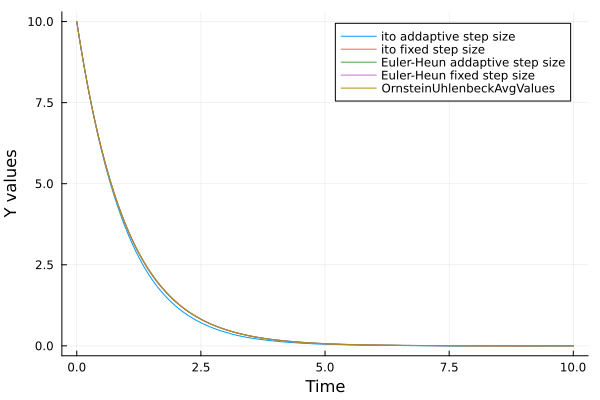

In [9]:
plot(arr,soln, xlabel = "Time", ylabel = "Y values", label = "ito addaptive step size")
plot!(arr1,soln2, xlabel = "Time", ylabel = "Y values", label = "ito fixed step size")
plot!(arr,soln3, xlabel = "Time", ylabel = "Y values", label = "Euler-Heun addaptive step size")
plot!(arr,soln4, xlabel = "Time", ylabel = "Y values", label = "Euler-Heun fixed step size")
plot!(arr,soln5, xlabel = "Time", ylabel = "Y values", label = "OrnsteinUhlenbeckAvgValues")

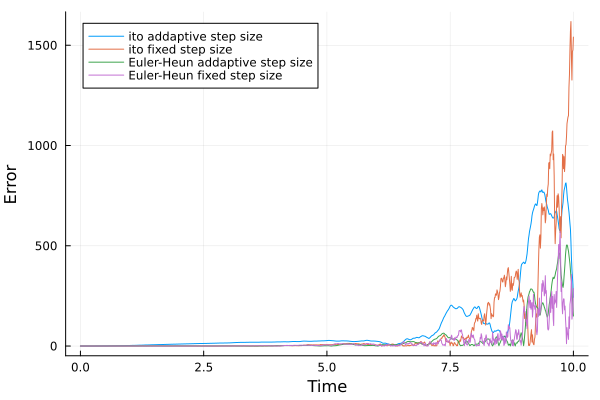

In [10]:
plot(arr,error1, xlabel = "Time", ylabel = "Error", label = "ito addaptive step size")
plot!(arr1,error2, xlabel = "Time", ylabel = "Error", label = "ito fixed step size")
plot!(arr,error3, xlabel = "Time", ylabel = "Error", label = "Euler-Heun addaptive step size")
plot!(arr1,error4, xlabel = "Time", ylabel = "Error", label = "Euler-Heun fixed step size")

In [ ]:
plot(arr2,tims, xlabel = "samples", ylabel = "Time", label = "ito addaptive step size")
plot!(arr2,tims2, xlabel = "samples", ylabel = "Time", label = "ito fixed step size")
plot!(arr2,tims3, xlabel = "samples", ylabel = "Time", label = "Euler-Heun addaptive step size")
plot!(arr2,tims4, xlabel = "samples", ylabel = "Time", label = "Euler-Heun fixed step size")

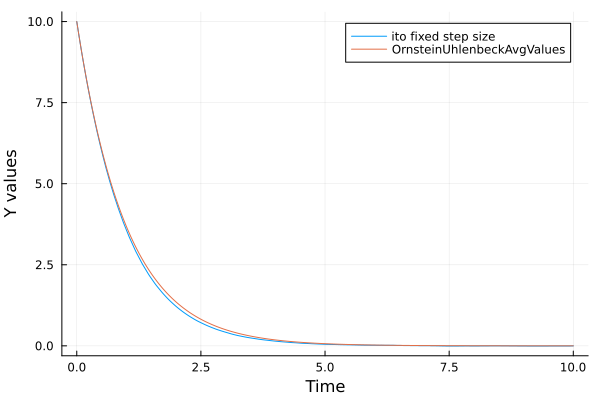

In [12]:
plot(arr1,soln, xlabel = "Time", ylabel = "Y values", label = "ito fixed step size")
plot!(arr,soln5, xlabel = "Time", ylabel = "Y values", label = "OrnsteinUhlenbeckAvgValues")